In [1]:
# Force keras to use the CPU becuase it's actually faster for this size network
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import pandas as pd

from numpy import cos, sin, pi
import matplotlib.pyplot as plt
import scipy.integrate as integrate

%matplotlib inline
import matplotlib.animation as animation

from IPython.display import HTML

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.constraints import max_norm


from pendulum_class import Pendulum

/Users/sgillen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [31]:
bot = Pendulum()

rad = pi/180

def controller(q, t=0):
    if (q[0] < 140 * rad) or (q[0] > 220 * rad):
        return q[1]*4
    else:
    # balancing
    # LQR: K values from MATLAB
        k1 = 140.560
        k2 = 60.162
        u = -(k1 * (q[0] - pi) + k2 * q[1])
    return u
    
bot.control = controller


theta = .1
th_dot = .1

# initial state
init_state = np.array([theta, th_dot])
dt = 0.1
time = np.arange(0.0, 5, dt)

# integrate the ODE using scipy.integrate.
u_hist = []
y = integrate.odeint(bot.derivs, init_state, time)

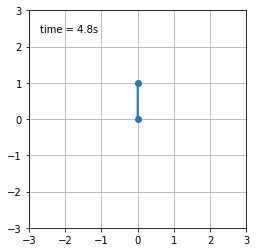

In [32]:
ani = bot.animate(time, y)
HTML(ani.to_jshtml())

In [20]:
def controller(q):
    if (q[0] < 140 * rad) or (q[0] > 220 * rad):
        return -q[1] * 10
    else:
        # balancing
        # LQR: K values from MATLAB
        k1 = 140.560
        k2 = -3.162
        k3 = 41.772
        k4 = -8.314
        u = -(k1 * (q[0] - pi) + k2 * q[1] + k3 * q[2] + k4 * q[3])
        return u
    
bot.control = controller